In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [4]:
plt.style.use('ggplot')

In [9]:
sixty = pd.read_csv('../data/860m_clean.csv')
sixtyone = pd.read_csv('../data/861m_clean.csv')
combined = pd.read_csv('../data/combined.csv')

In [10]:
sixty.head()

,UTILITYNUMBER,UTILITYNAME,PLANTID,PLANTNAME,NETSUMMERCAPACITY(MW),LATITUDE,LONGITUDE,MONTH,NAMEPLATECAPACITY(MW),NETWINTERCAPACITY(MW),DATAYEAR,GEN_TYPE
0,195,Alabama Power Co,2.0,Bankhead Dam,56.0,33.458665,-87.356823,1,56.0,56.0,2016,hydroelectric
1,195,Alabama Power Co,3.0,Barry,138.0,31.006900,-88.010300,1,138.0,138.0,2016,coal
2,195,Alabama Power Co,3.0,Barry,137.0,31.006900,-88.010300,1,137.0,137.0,2016,coal
3,195,Alabama Power Co,3.0,Barry,249.0,31.006900,-88.010300,1,249.0,249.0,2016,coal
4,195,Alabama Power Co,3.0,Barry,362.0,31.006900,-88.010300,1,362.0,362.0,2016,coal


In [11]:
sixtyone.head()

,DATAYEAR,MONTH,UTILITYNUMBER,UTILITYNAME,TOTALREVENUE,TOTALSALES,TOTALCUSTOMERS,OWNERTYPE
0,2016,1,84,A & N Electric Coop,5863.315,52619.079,35170,2
1,2016,1,176,Ajo Improvement Co,80.140,784.000,989,3
2,2016,1,195,Alabama Power Co,439393.000,4872926.000,1459675,3
3,2016,1,213,Alaska Electric Light&Power Co,4283.966,39417.826,16776,3
4,2016,1,219,Alaska Power and Telephone Co,1470.807,5414.652,7639,3


In [45]:
combined.head() 


,DATAYEAR,MONTH,UTILITYNUMBER,NETSUMMERCAPACITY(MW),NETWINTERCAPACITY(MW),NAMEPLATECAPACITY(MW),is_coal,is_geothermal,is_hydroelectric,is_natural_gas,...,MW_HYDROELECTRIC,MW_NATURAL_GAS,MW_NUCLEAR,MW_OIL,MW_OTHER,MW_SOLAR,MW_WIND,TOTALREVENUE,TOTALSALES,TOTALCUSTOMERS
0,2016,1,84,5.4,5.4,5.4,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,5.4,0.0,0.0,0.0,5863.315,52619.079,35170
1,2016,1,195,13431.8,13431.8,13431.8,0.244186,0.0,0.476744,0.244186,...,1673.7,2123.7,1757.0,16.0,0.0,0.0,0.0,439393.000,4872926.000,1459675
2,2016,1,213,196.6,196.6,196.6,0.000000,0.0,0.344828,0.000000,...,102.7,0.0,0.0,93.9,0.0,0.0,0.0,4283.966,39417.826,16776
3,2016,1,219,42.7,42.7,42.7,0.000000,0.0,0.210526,0.000000,...,14.4,0.0,0.0,28.3,0.0,0.0,0.0,1470.807,5414.652,7639
4,2016,1,221,54.7,54.7,54.7,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,54.7,0.0,0.0,0.0,5015.000,11093.000,10887


In [47]:
combined.columns

Index(['DATAYEAR', 'MONTH', 'UTILITYNUMBER', 'NETSUMMERCAPACITY(MW)',
       'NETWINTERCAPACITY(MW)', 'NAMEPLATECAPACITY(MW)', 'is_coal',
       'is_geothermal', 'is_hydroelectric', 'is_natural_gas', 'is_nuclear',
       'is_oil', 'is_other/unreported', 'is_solar', 'is_wind', 'MW_COAL',
       'MW_GEOTHERMAL', 'MW_HYDROELECTRIC', 'MW_NATURAL_GAS', 'MW_NUCLEAR',
       'MW_OIL', 'MW_OTHER', 'MW_SOLAR', 'MW_WIND', 'TOTALREVENUE',
       'TOTALSALES', 'TOTALCUSTOMERS'],
      dtype='object')

In [70]:
def month(row):
    if row['DATAYEAR'] == 2016:
        return row['MONTH']
    elif row['DATAYEAR'] == 2017:
        return (12+row['MONTH'])
    elif row['DATAYEAR'] == 2018:
        return (24+row['MONTH'])
    elif row['DATAYEAR'] == 2019:
        return (36+row['MONTH'])
    

def histplot_raw(df,ax,colname='TOTALREVENUE'):
    ax.hist(df[colname],bins=20,edgecolor='black')
    ax.set_xlabel('Revenue',fontsize=16)
    ax.set_ylabel('Count of Datapoints',fontsize=16)
    ax.set_title('Distribution of Revenues (No Transformation)',fontsize=22)
    
def histplot_transform(df,ax,colname='TOTALREVENUE'):
    ax.hist(np.log(df[colname]),bins=20,edgecolor='black')
    ax.set_xlabel('Revenue',fontsize=16)
    ax.set_ylabel('Count of Datapoints',fontsize=16)
    ax.set_title('Distribution of Revenues (With Transformation)',fontsize=22)
    
def plot_gen_type(df,ax,labels,colnames=['MW_COAL','MW_GEOTHERMAL', 'MW_HYDROELECTRIC',
                                  'MW_NATURAL_GAS', 'MW_NUCLEAR','MW_OIL', 'MW_OTHER',
                                  'MW_SOLAR', 'MW_WIND']):
    for idx, col in enumerate(colnames):
        ax.plot(df['MONTH_YEAR'],df[col],label=labels[idx])
    ax.legend()
    ax.set_xlabel('Months',fontsize=16)
    ax.set_ylabel('Average MW Generated',fontsize=16)

In [54]:
combined['MONTH_YEAR'] = combined.apply (lambda row: month(row),axis=1)

In [57]:
avg_gen = combined.groupby(['MONTH_YEAR']).agg({'MW_COAL':'sum','MW_GEOTHERMAL':'sum', 'MW_HYDROELECTRIC':'sum',
                                  'MW_NATURAL_GAS':'sum', 'MW_NUCLEAR':'sum','MW_OIL':'sum', 'MW_OTHER':'sum',
                                  'MW_SOLAR':'sum', 'MW_WIND':'sum'})
avg_gen = avg_gen.reset_index()
avg_gen

,MONTH_YEAR,MW_COAL,MW_GEOTHERMAL,MW_HYDROELECTRIC,MW_NATURAL_GAS,MW_NUCLEAR,MW_OIL,MW_OTHER,MW_SOLAR,MW_WIND
0,1.0,170105.7,35.8,39186.3,172377.3,48669.9,17066.4,835.5,764.8,9387.7
1,2.0,169571.6,35.8,39211.1,170256.2,48742.9,16820.5,794.7,771.0,9805.1
2,3.0,168666.5,35.8,39191.9,170734.7,48723.4,15892.7,794.7,795.4,9834.2
3,4.0,184040.1,48.5,38509.6,202501.7,51270.1,18412.2,954.9,864.9,10543.9
4,5.0,183809.8,48.5,38588.4,202996.5,51270.1,18410.6,960.9,878.1,10543.9
5,6.0,183289.8,48.5,38588.4,203016.6,52540.0,18410.9,985.9,895.2,10542.6
6,7.0,182576.8,48.5,38591.3,204204.2,52540.0,18410.9,985.9,935.7,10542.6
7,8.0,181754.8,48.5,38597.7,204199.5,52540.0,18327.3,985.9,951.0,10686.6
8,9.0,181754.8,48.5,38597.7,204331.3,52540.0,18327.3,987.9,951.0,10777.1
9,10.0,181754.8,48.5,38597.7,204331.3,52038.0,18327.3,1017.9,1012.4,10777.1


Text(0.5, 1.0, 'Renewable Energy Trends')

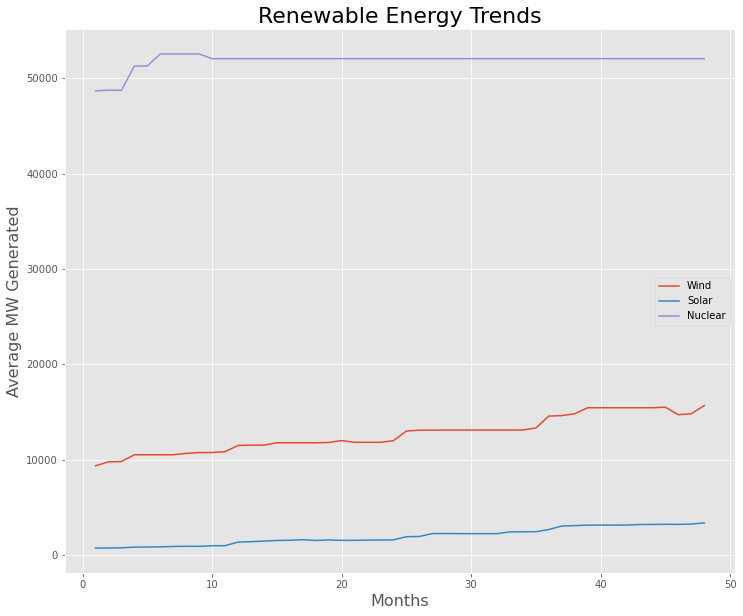

In [76]:
fig, ax = plt.subplots(figsize=(12,10))
plot_gen_type(avg_gen,ax,['Wind','Solar','Nuclear'],['MW_WIND','MW_SOLAR','MW_NUCLEAR'])
ax.set_title('Renewable Energy Trends',fontsize=22)